In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import talib as tb
from talib import stream
import mplfinance as mpf
from data_utils.get_data import *
from trendln import *
from indicators.indicators import *
from indicators.custom_indicators import *
%matplotlib qt

In [122]:
acq_window = 500
reg_window = 100
reg_mean = 75
deviation = 0.75 / 100

#Price to apply indicators on
price_col = 'Close'


In [123]:
path = './data/csv/EURUSD.s60.csv'

rates = load_frames(path)
rates.tail()
rates = rates[-acq_window:]

In [34]:
rates.tail()

,Open,High,Low,Close,Volume,timestamp
Date,,,,,,
2021-02-26 19:00:00,1.20914,1.20936,1.20734,1.20796,4981,1614366000
2021-02-26 20:00:00,1.20797,1.20862,1.20716,1.20829,4910,1614369600
2021-02-26 21:00:00,1.20827,1.20897,1.20762,1.20773,3493,1614373200
2021-02-26 22:00:00,1.20772,1.20790,1.20647,1.20649,3322,1614376800
2021-02-26 23:00:00,1.20651,1.20741,1.20619,1.20731,2697,1614380400


In [35]:
df_HA,keys = create_HA(rates)

In [49]:
%%capture
keys_1 = reg_envelopes(df_HA, price_col ,deviation,reg_window,reg_mean)
keys_2 = create_MACD(df_HA)
keys_3 = create_moving_average(df_HA,range1 = 55,range2 = 21)

In [50]:
addp = mpf.make_addplot(df_HA[keys_1])
addp2 = mpf.make_addplot(df_HA[keys_2],panel=2)
addp3 = mpf.make_addplot(df_HA[['MA1','MA2']])

In [51]:
mpf.plot(rates, type='candle', volume = True,addplot = [addp,addp2,addp3], style = 'yahoo',show_nontrading = False)

In [52]:
minimaIdxs, maximaIdxs = get_extrema(
	rates.Close,
	extmethod=METHOD_NUMDIFF,
	accuracy=2)
# parameters and results are as per defined for calc_support_resistance
Extremum_indexes = sorted(minimaIdxs + maximaIdxs)

In [61]:
plt.plot(rates.Close,markevery=Extremum_indexes ,marker='.',c='blue', mfc='red', mec='k')


In [164]:
keys = create_zigzag(rates,pct = 0.4)

In [165]:
rates.head(50)

,Open,High,Low,Close,Volume,timestamp,ZigZag
Date,,,,,,,
2021-01-29 04:00:00,1.21079,1.21089,1.21017,1.21039,2267,1611892800,1.210390
2021-01-29 05:00:00,1.21039,1.21061,1.20970,1.20970,1965,1611896400,1.210820
2021-01-29 06:00:00,1.20969,1.21016,1.20948,1.20994,2463,1611900000,1.211250
2021-01-29 07:00:00,1.20993,1.21014,1.20940,1.20993,2154,1611903600,1.211680
2021-01-29 08:00:00,1.20990,1.21065,1.20977,1.21051,2356,1611907200,1.212110
2021-01-29 09:00:00,1.21051,1.21086,1.20994,1.21038,4364,1611910800,1.212540
2021-01-29 10:00:00,1.21039,1.21193,1.20972,1.21172,5640,1611914400,1.212970
2021-01-29 11:00:00,1.21173,1.21209,1.21056,1.21163,5833,1611918000,1.213400
2021-01-29 12:00:00,1.21160,1.21342,1.21067,1.21341,5692,1611921600,1.213830


In [153]:
len(x)

500

In [166]:
addp3 = mpf.make_addplot(rates[['ZigZag']])
mpf.plot(rates, type='candle', volume = True,addplot = [addp3], style = 'yahoo',show_nontrading = False)

In [8]:
X_buy, X_buy_chart, Y_reg_buy, X_sell, X_sell_chart, Y_reg_sell, X_hold, X_hold_chart, Y_reg_hold = generate_data(rates, 
                                r = 1,
                                test = False,
                                save_img = True,
                                tp = 0.00500, 
                                sl = 0.00250, 
                                sl_h = 0.00150, 
                                window_range_back = 30, 
                                window_range_front = 15)

(9, 30, 9)
(9, 15, 9)
(9, 345, 480, 3)
(6, 30, 9)
(6, 15, 9)
(6, 345, 480, 3)
(17, 30, 9)
(17, 15, 9)
(17, 345, 480, 3)


In [9]:
x = X_buy_chart[0]

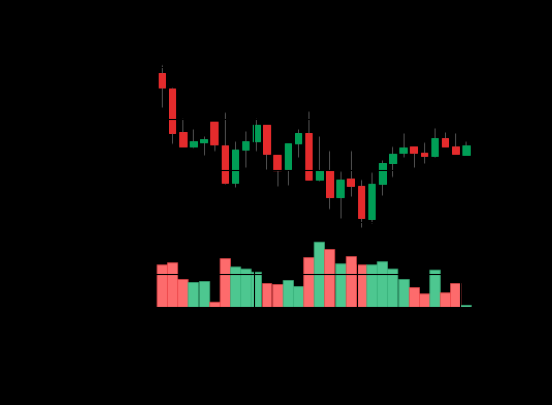

In [10]:
plt.imshow(x)
#Resolution, cropping and grid removal next.